# 데이터 분할

- 머신러닝 모델의 성능을 정확하게 평가하기 위해서는 훈련에 사용하지 않은 테스트 세트를 통해 평가해야함
- 평가를 위한 별도의 데이터를 준비하거나 준비된 데이터 중에 일부를 떼어 테스트 세트로 준비
- 훈련 : 테스트 비율은 70 ~ 80 : 20 ~ 30
    - 반드시 정해져 있는 것은 아니며 연구자 임의로 조절 가능함
    - 전체 데이터가 아주 크고 모든 데이터 패턴을 잘 담아내기만 한다면 테스트 데이터는 1%만 사용해도 충분할 수 있음

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./data/Fish.csv")
df = df[df["Species"].isin(["Bream", "Smelt"])][["Species", "Weight", "Length2"]]

In [4]:
df.head()

,Species,Weight,Length2
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [5]:
le = LabelEncoder()
df["label"] = le.fit_transform(df["Species"])

In [6]:
df.head()

,Species,Weight,Length2,label
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


In [7]:
df.shape

(49, 4)

## 샘플링 편향

- 훈련 세트에 도미 데이터와 빙어 데이터가 골고루 들어가 있지 않다면 올바르게 분류할 수 없음
    - 예) 빙어 없이 모델 훈련이 이루어진다면 어떤 데이터를 빙어로 분류해야할지 알 수 없음
- 데이터가 골고루 섞여있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 샘플링 편향(sampling bias)라고 부름

### train_test_split()

- 전달되는 리스트나 배열을 섞은 후 비율에 맞게 훈련 세트와 테스트 세트로 나누어 주는 함수
- 매개변수
    - 첫 번째 매개변수 : 피처 데이터 세트
    - 두 번째 매개변수 : 레이블 데이터 세트
    
    - test_size
        - 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링 할 것인가를 결정
        - 초기값은 0.25
    
    - train_size
        - 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링 할 것인가를 결정
        - 일반적으로는 test_size 를 활용
        
    - shuffle
        - 데이터를 분리하기 전에 미리 섞을지를 결정
        - 초기값은 True
        - 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용
        
    - random_state
        - 매번 코드를 실행할 때마다 다른 결과가 나온다면 정확하게 모델을 평가할 수 없고 모델 최적화에 어려움이 있음
        - 난수를 생성할 때 특정한 규칙으로 생성해서 매번 같은 결과가 나오게 통제할 수 있음
        
    - stratify
        - 무작위로 데이터를 섞으면 샘플링 편향이 일어날 수 있기 때문에 기존 데이터의 비율과 같은 비율로 데이터를 나눌 수 있도록 할 수 있음
        
- 반환값
    - 튜플 형태
    - 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 순서대로 반환

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "Weight"]], df[["label"]], test_size = 0.25,
                                                    stratify = df[["label"]], random_state = 7)

In [10]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

36 13 36 13


In [11]:
y_test

,label
28,0
4,0
151,1
33,0
19,0
23,0
25,0
3,0
147,1
14,0


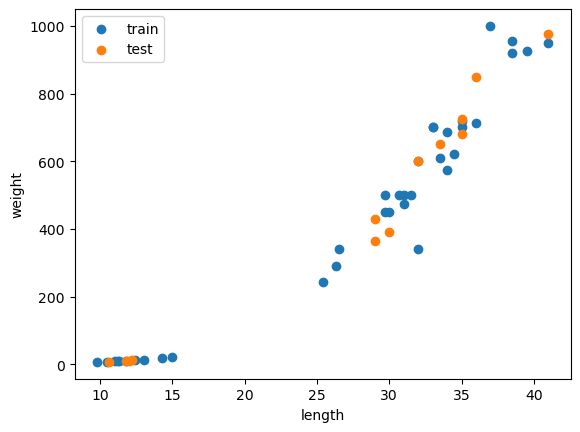

In [13]:
plt.figure()

plt.scatter(x_train["Length2"], x_train["Weight"], label = "train")
plt.scatter(x_test["Length2"], x_test["Weight"], label = "test")

plt.legend()
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 모델 훈련

In [14]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [16]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

# 모델 평가

In [17]:
knn.score(x_test, y_test)

1.0

# 모델 최적화

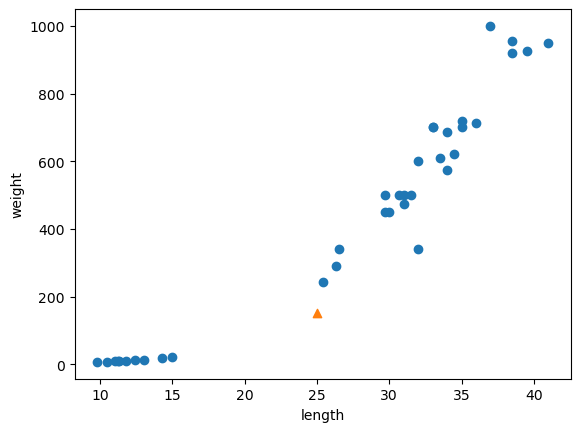

In [25]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [26]:
knn.predict([[25, 150]])

array([1])

- kneighbors()
    - 이웃까지의 거리와 이웃 샘플의 인덱스를 반환

In [27]:
dist, idx = knn.kneighbors([[25, 150]])

In [28]:
dist

array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
        138.32150953]])

In [29]:
idx

array([[ 8, 19, 31, 24, 10]], dtype=int64)

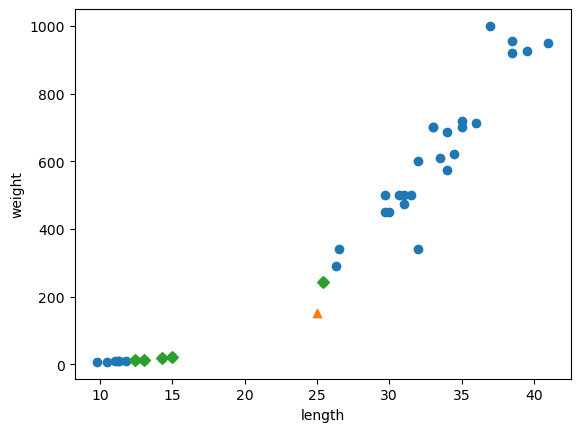

In [31]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")
plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [32]:
x_train.iloc[idx.flatten()]

,Length2,Weight
0,25.4,242.0
158,15.0,19.9
157,14.3,19.7
155,12.4,13.4
156,13.0,12.2


- x축은 범위가 좁고 y축은 범위가 넓기 때문에 y축으로 조금만 차이가 벌어져도 큰 값으로 거리가 계산됨

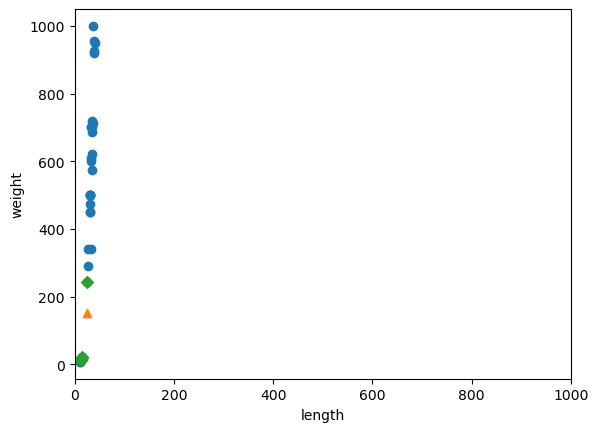

In [33]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")
plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.xlim(0, 1000)
plt.show()

- 시각화 자료를 참고하면 현재 데이터에서 생선의 길이는 모델이 값을 예측하는데에 거의 사용되지 않고 있음
    - 두 독립변수의 단위가 다르기 때문에
    
- knn은 특히 데이터 간 거리가 모델 성능에 영향을 많이 주는 특성이 있음
    - 각 독립변수의 단위가 다르면 올바른 예측이 어려울 가능성이 높음
    
- 각 독립변수의 단위를 일정한 기준으로 맞춰주는 작업을 스케일링(scaling)이라고 함

## 스케일링

- 스탠다드 스케일링(standard scaling)
    - 각 피처 값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타내 데이터의 단위와 관계없이 동일한 조건으로 비교할 수 있게 변환
        - 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 계산
        - 표준편차 : 분산의 제곱근. 데이터가 분산된 정도
    - 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
        - 몇몇 알고리즘에서는 데이터가 가우시안 정규 분포를 가지고 있다고 가정하고 구현하기 때문에 스탠다드 스케일링이 예측 성능 향상에 중요한 요소가 될 수 있음
            - 서포트 벡터 머신, 선형 회귀, 로지스틱 회귀
            
    - 계산식
        - (특성값 - 평균) / 표준편차
        
- MinMaxScaler
    - 데이터 값을 0과 1 사이의 범위값으로 변환
        - 음수 값이 있으면 -1에서 1 사이의 값으로 변환
        
- 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
    - scaler 객체를 이용해 데이터 스케일링 변환 시 사용 메서드
        - fit()
            - 데이터 변환을 위한 기준 정보 설정
            - 예) 데이터 세트의 최댓값/최솟값 설정 등
            
        - transform()
            - fit() 으로 설정된 정보를 이용해 데이터를 변환
            
        - fit_transform()
            - fit()과 transform()을 한 번에 적용
            
    - **학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야함**
        - 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못함

In [34]:
ss = StandardScaler()

In [35]:
scaled_x_train = ss.fit_transform(x_train)

In [36]:
scaled_x_train

array([[ 0.38158347,  0.08784528],
       [-1.537998  , -1.35204327],
       [ 0.25161181,  0.01044856],
       [ 0.38158347,  0.16524199],
       [ 0.48156167,  0.47482887],
       [ 0.58153987,  0.78441574],
       [-0.08831408, -0.48489044],
       [ 0.28160527,  0.01044856],
       [-0.17829446, -0.63349214],
       [ 0.68151807,  0.73797771],
       [-1.41802416, -1.34492277],
       [-1.59798492, -1.35235286],
       [ 0.43157257,  0.16524199],
       [ 0.98145268,  1.71317636],
       [ 0.73150717,  0.53674624],
       [ 0.58153987,  0.78441574],
       [ 1.38136549,  1.55838292],
       [ 0.25161181,  0.16524199],
       [ 0.63152897,  0.50578755],
       [-1.21806776, -1.32108459],
       [ 0.48156167, -0.330097  ],
       [ 0.78149628,  0.78441574],
       [ 1.13141998,  1.46550686],
       [-1.61798056, -1.35266245],
       [-1.47801108, -1.34120773],
       [-0.06831844, -0.330097  ],
       [ 0.35159001,  0.16524199],
       [ 1.23139818,  1.48098621],
       [ 1.13141998,

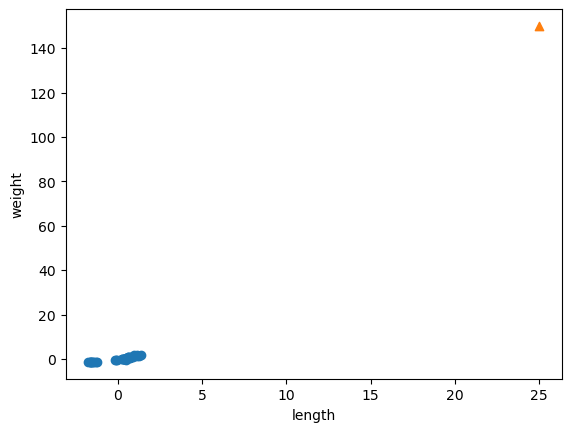

In [39]:
# 스케일링된 데이터 시각화
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(25, 150, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 값의 스케일이 달라졌기 때문에 테스트 데이터도 스케일링 해줘야 함

In [40]:
scaled_data = ss.transform([[25, 150]])
scaled_data

array([[-0.21828574, -0.91831206]])

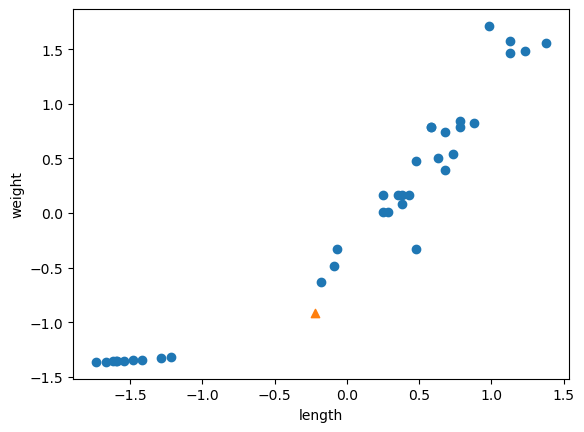

In [41]:
# 스케일링된 데이터 시각화
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [42]:
# 테스트 데이터 스케일링
scaled_x_test = ss.transform(x_test)

In [43]:
# 스케일링된 데이터로 다시 모델 훈련
knn = KNeighborsClassifier(n_neighbors = 5)

In [44]:
knn.fit(scaled_x_train, y_train)

KNeighborsClassifier()

In [45]:
# 모델 평가
knn.score(scaled_x_test, y_test)

1.0

In [46]:
# 문제의 데이터 예측
knn.predict(scaled_data)

array([0])

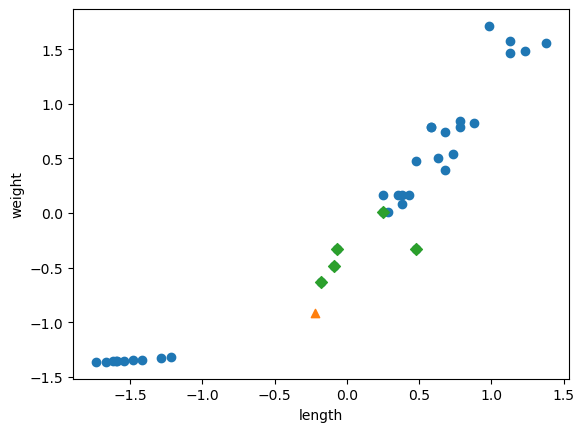

In [47]:
# 시각화
dist, idx = knn.kneighbors(scaled_data)

plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker = "^")
plt.scatter(scaled_x_train[idx.flatten(), 0], scaled_x_train[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

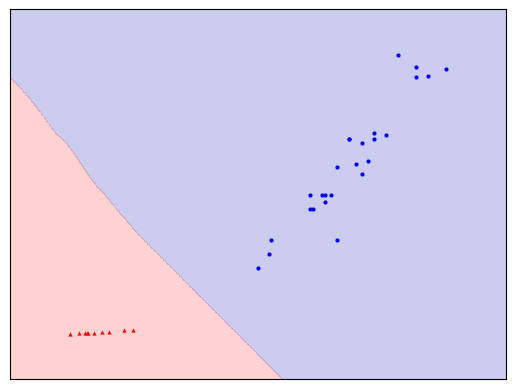

In [48]:
# 결정경계 시각화

plt.figure()

mglearn.plots.plot_2d_separator(knn, scaled_x_train, fill = True, eps = 0.5, alpha = 0.2)
mglearn.discrete_scatter(scaled_x_train[:, 0].reshape(-1, 1),
                        scaled_x_train[:, 1].reshape(-1, 1),
                        y_train,
                        markeredgewidth = 0.1, c = ["b", "r"], s = 3)


plt.show()